## Overfitting and Underfitting of SVM Models

In [1]:
# Cell_1 - DO NOT CHANGE

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_circles
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

cm_bright = ListedColormap(['#FF0000', '#0000FF'])


%matplotlib inline

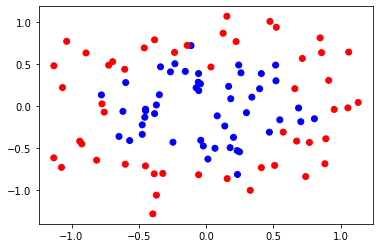

In [2]:
#Cell_2 - DO NOT CHANGE

#Generate complex synthetic two-dimensional data
#-  These data appear such that data points of one class surround the data points of the other class
#-  In other words, these data are not simply linearly separable

# Synthetic data
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

# Visualize the generated dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

In [3]:
# Cell_3 - DO NOT CHANGE
def TrainTest(names, classifiers, X, y, xx, yy):
    i = 1
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(1, len(classifiers), i)
        clf.fit(X, y)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        i += 1
    plt.show()
    
# Cell_3: DO NOT CHANGE
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    
    # Initialise the marker types and colors
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    color_Map = ListedColormap(colors[:len(np.unique(y))]) #we take the color mapping correspoding to the 
                                                            #amount of classes in the target data
    classifier.fit(X, y)
    
    # Parameters for the graph and decision surface
    x1_min = X[:,0].min() - 1
    x1_max = X[:,0].max() + 1
    x2_min = X[:,1].min() - 1
    x2_max = X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contour(xx1,xx2,Z,alpha=0.4,cmap = color_Map)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # Plot samples
    X_test, Y_test = X[test_idx,:], y[test_idx]
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8, c = color_Map(idx),
                    marker = markers[idx], label = cl
                   )

**In the cell below, initialize a SVM classifier with a RBF kernel,  specifying the value of $\gamma$, after reading the questions at the end of this document**


Note: 
- Gamma ($\gamma$) is a parameter that defines the kernel coefficient for the RBF kernel.
- RBF kernel gives nearest data points higher influence on the classification of a new data point while the farther data points are given relatiely lower influence on the classification of the new data point
- The RBF kernel is given by: $e^{-\gamma (a-b)^2}$
    - where a,b are two data points
    - $(a-b)^2$ is the squared distance between the two data points a,b
        - the amount of influence one data point has over another is a function of the squared distance
    - $\gamma$ scales the above squared distance
        - hence it scales the influence
- See https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html and https://www.youtube.com/watch?v=Qc5IyLW_hns for more details if interested to know more about SVM with RBF kernels.

In [49]:
# Cell_4 - TO DO / MODIFY

Gamma = 0.01# Enter value for Gamma

classifiers = [SVC(kernel='rbf', gamma=Gamma)]        # Initializing SVM classifier with a specific value of gamma.
    
names = ["SVM (rbf, $\gamma = %2f$)"%(Gamma)]


Now, run the cell below to train and test the SVM classifier initialized above. It should generate the visualizations of the SVM classifier

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


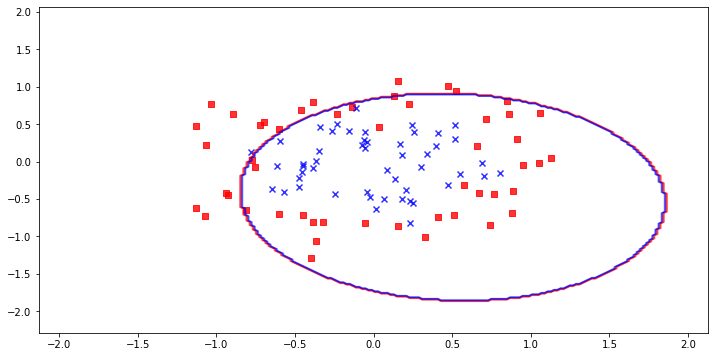

In [50]:
# Cell_5 - DO NOT CHANGE, JUST RUN
figure = plt.figure(figsize=(12, 6))

h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cm = plt.cm.RdBu

#TrainTest(names, classifiers, X, y, xx, yy)
plot_decision_regions(X=X, y=y, classifier=classifiers[0])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


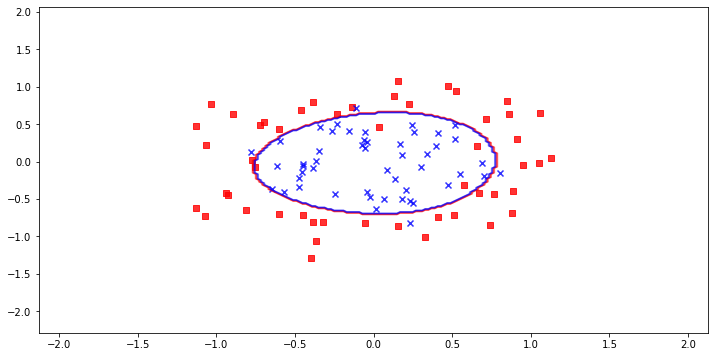

In [47]:
# Cell_5 - DO NOT CHANGE, JUST RUN
figure = plt.figure(figsize=(12, 6))

h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cm = plt.cm.RdBu

#TrainTest(names, classifiers, X, y, xx, yy)
plot_decision_regions(X=X, y=y, classifier=classifiers[0])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


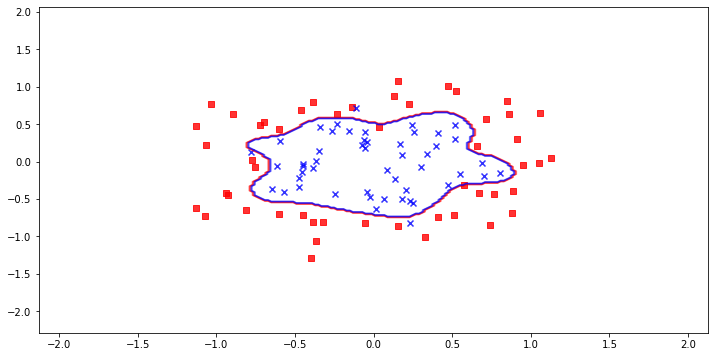

In [10]:
# Cell_5 - DO NOT CHANGE, JUST RUN
figure = plt.figure(figsize=(12, 6))

h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cm = plt.cm.RdBu

#TrainTest(names, classifiers, X, y, xx, yy)
plot_decision_regions(X=X, y=y, classifier=classifiers[0])

## Questions

The data provided in the file comprises of two classes, namely blue and red. Running the Cell_5 will generate a scatter plot which shows the decision boundary for the trained SVM model.


1. Train three different SVM classifiers, each with the specified values of:
    - (a) SVM RBF with $\gamma=0.001$
    - (b) SVM RBF with $\gamma=1$
    - (c) SVM RBF with $\gamma=20$
    
* For each SVM machine above Generate the scatter plots (Hint: Specify the $\gamma$ value in Cell_4 then generate a scatter plot by running Cell_5 for the SVM with that value of $\gamma$). 
   
* Observe the three plots in detail and think of the differences, the similarities, and the effect each model has on the ultimate prediction. Then, answer these questions below. 
    
* Include the three scatter plots you generated by running Cell_5 for the three SVMs.


2. Which of the three SVM models seems to be underfitting? (Choose one and justify why)
    - (a) SVM RBF with $\gamma=0.001$
    
    
3. Which of the three SVM models seems to be overfitting? (Choose one and justify why)
    - (c) SVM RBF with $\gamma=20$
    
    
4. The provided code assumes that all the data is used for testing and testing. In Cell_6 write a complete code that can perform classification using SVM utilizing the “RBF” kernel with the following properties:
    1. The code should split the data randomly into training and testing sets where the testing points are 30% of all the data. 
    2.	Use the training and testing set obtained in the previous step to find a value of 𝛾 that gives a good fitting SVM model for the given dataset? Your code should be capable of displaying multiple 𝛾 values and the corresponding accuracy. 
        1. (Hint: A good fitting model can be regarded as one which has a high accuracy score on training data as well as on testing data and the difference in the scores between training and testing is less than or equal to 0.05)

## Student's Answer

In [11]:
# Cell_6: TO DO --- Your code here to answer Q.4 above
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)



In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0


In [51]:
from sklearn import svm
import numpy as np
for i in np.arange(0.1,10,0.1):
    classifier = svm.SVC(kernel='rbf', gamma=i)
    classifier.fit(X_train, y_train)


    y_pred = classifier.predict(X_test)


    print("gamma = %.1f"%i)
    print("accuracy =",accuracy_metric(y_test,y_pred),"%\n")


gamma = 0.1
accuracy = 80.0 %

gamma = 0.2
accuracy = 90.0 %

gamma = 0.3
accuracy = 90.0 %

gamma = 0.4
accuracy = 90.0 %

gamma = 0.5
accuracy = 90.0 %

gamma = 0.6
accuracy = 90.0 %

gamma = 0.7
accuracy = 90.0 %

gamma = 0.8
accuracy = 90.0 %

gamma = 0.9
accuracy = 90.0 %

gamma = 1.0
accuracy = 90.0 %

gamma = 1.1
accuracy = 90.0 %

gamma = 1.2
accuracy = 85.0 %

gamma = 1.3
accuracy = 85.0 %

gamma = 1.4
accuracy = 85.0 %

gamma = 1.5
accuracy = 85.0 %

gamma = 1.6
accuracy = 85.0 %

gamma = 1.7
accuracy = 85.0 %

gamma = 1.8
accuracy = 85.0 %

gamma = 1.9
accuracy = 85.0 %

gamma = 2.0
accuracy = 85.0 %

gamma = 2.1
accuracy = 85.0 %

gamma = 2.2
accuracy = 80.0 %

gamma = 2.3
accuracy = 80.0 %

gamma = 2.4
accuracy = 80.0 %

gamma = 2.5
accuracy = 85.0 %

gamma = 2.6
accuracy = 85.0 %

gamma = 2.7
accuracy = 85.0 %

gamma = 2.8
accuracy = 85.0 %

gamma = 2.9
accuracy = 85.0 %

gamma = 3.0
accuracy = 85.0 %

gamma = 3.1
accuracy = 85.0 %

gamma = 3.2
accuracy = 85.0 %

gamma = 

In [ ]:
#the most accurate values for lambda are 0.2 - 1.1 with 90% accuracy